# [Project Title]

**Author:**  
**Date:**  

Short 1–2 sentence summary of what this notebook is about.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Video URL and Description

**Video URL:**  
<insert link here>

**Brief Description (3–5 sentences):**  


## 2. Research Question

To what extent do TikTok comments align with a mental-load framing (wife’s perspective) versus a communication-framing (husband’s perspective), and does the platform appear to preferentially surface one framing over the other?



## 3. Concepts and How They Changed with Coding

**Initial Definition of concepts**:

concept1 = "Code 1 if the comment agrees with the wife's point of view regarding exhaustion, mental load, and long-term unsustainability (This includes comments that find both parties equally convincing and both in the wrong). Code 0 if the comment does not agree with the wife or if the comment is unrelated to the situation in the video." 

concept2 = "Code 1 if the comment agrees with the husband's point of view regarding a lack of communication of wants and unreasonable expectations. (This includes comments that find both parties equally convincing and both in the wrong). Code 0 if the comment does not agree with the husband or if the comment is unrelated to the situation in the video."

**How They Changed with Coding**:
Working with the data showed that these definition created overlap and ambiguity. Many comments criticized both people, joked about the situation, or talked about mental load/making lists in general without clearly “taking her/his side.” Including “both in the wrong” under agreement with the wife blurred the line between supporting her and just criticizing the relationship. This made me see that “agreement” needs more precise, narrower rules if I want consistent labels. Besides, add examples while explainning the concepts would be very helpful under this circumstance.

## 4. Final LLM Prompt and Inter-Rater Reliability Scores

### 4.1 Final LLM Prompt

LLM_prompt = 

"""
You are a research assistant. 
You will receive a series of TikTok comments about a conflict between a wife and a husband.

Your task is to assign two independent binary labels to EACH comment:

- concept1: whether the comment agrees with the wife's perspective
- concept2: whether the comment agrees with the husband's perspective

Background of the conflict:
- The wife’s perspective focuses on exhaustion, mental load, and the long-term unsustainability of the current situation.
- The husband’s perspective focuses on a lack of clear communication of needs and expectations (e.g., “You have to tell me what you want me to do”).

DEFINITIONS

concept1 (wife / mental load):
- Code concept1 = 1 if the comment agrees with the wife's point of view about:
  * exhaustion, mental load, unfair burden of chores or emotional labor,
  * weaponized incompetence, needing to manage the partner like a child,
  * the situation being long-term unsustainable or fundamentally unfair.
- Also code concept1 = 1 if the comment clearly supports both partners being at fault,
  BUT explicitly acknowledges the wife’s mental load, unfairness, or the husband’s incompetence.
- Code concept1 = 0 if the comment does NOT agree with the wife’s perspective,
  OR if the comment is unrelated to the situation.
- Set concept1 = 1 when a comment implies that the husband would not cope
  or function without the wife, or that the wife has to manage or teach him

- Set concept1 = 1 when the commenter clearly agrees that husbands should
  try harder, not "half-ass" chores, or that the wife’s expectations are
  reasonable because of his situation (e.g. staying home all day).

- When a comment explicitly presents BOTH perspectives (for example
  quoting "make a list" AND "don't tell me what to do"), and treats them
  as a conflict, set BOTH concept1 = 1 and concept2 = 1.

- When a commenter says they have the same problem and describes taking
  turns or putting each other in each other's shoes, treat this as
  supporting BOTH perspectives: {"concept1": 1, "concept2": 1}, unless
  they clearly blame only one side.

concept2 (husband / communication):
- Code concept2 = 1 if the comment agrees with the husband's point of view about:
  * the need to clearly communicate wants and expectations,
  * “you have to tell me what to do”, “I can’t know if you don’t ask”,
  * the main issue being miscommunication or unclear expectations.
- Also code concept2 = 1 if the comment clearly supports both partners being at fault,
  BUT emphasizes poor communication, unclear expectations, or mutual responsibility.
- Code concept2 = 0 if the comment does NOT agree with the husband’s perspective,
  OR if the comment is unrelated to the situation.

IMPORTANT NOTES

- The two concepts are INDEPENDENT. All combinations are possible:
  * { "concept1": 1, "concept2": 0 } → sides mainly with the wife / mental load.
  * { "concept1": 0, "concept2": 1 } → sides mainly with the husband / communication.
  * { "concept1": 1, "concept2": 1 } → sees both sides as valid / both at fault.
  * { "concept1": 0, "concept2": 0 } → neutral, unrelated, or only emotional reaction.

When in doubt:
- For rhetorical complaints about chores, unfair mental load, or “men being useless”,
  prefer concept1 = 1.
- For comments that focus on “you have to say what you want”, “you didn’t tell him”,
  or communication problems, prefer concept2 = 1.
- Do NOT set concept1 = 1 for short agreement-only replies such as
  “yes”, “same”, “facts”, “this!”, pure emojis, or @-replies,
  unless there is also a clear description of mental load or incompetence.
- If a comment only says that the speaker has had the same experience
  (e.g. "I just had the same conversation this morning", "same thing
  happened to me") without clearly saying that the wife is right or
  the husband is right, then set:
  {"concept1": 0, "concept2": 0}.
  
Here are some examples of correct labeling. Follow the same reasoning as in the examples
when labeling new texts. When a new text has similar wording or context, you may reuse
the same labels.

Example 1
Text: "It’s like you live in my brain"
Correct label: {"concept1": 0, "concept2": 0}

Example 2
Text: "I feel like a cleaning schedule would help fix this"
Correct label: {"concept1": 0, "concept2": 1}

Example 3
Text: "Why do men have to be told what to do 🤔"
Correct label: {"concept1": 1, "concept2": 0}

Example 4  (Indirect complaint = concept2)
Text: "What do women do when they live alone — scream at the mirror about chores?"
Correct label: {"concept1": 0, "concept2": 1}

Example 5  ("Make a list" sarcasm = concept2)
Text: "make a liiist.... 🎶🎶"
Correct label: {"concept1": 0, "concept2": 1}

Example 6  (Typical weaponized incompetence = concept1)
Text: "then he will intentionally do them wrong... to be right when she has to redo it. mine gives her a bath but never washes her hair."
Correct label: {"concept1": 1, "concept2": 0}

Example 7  (Directive about chores = concept1)
Text: "if you see a chore that can be done, do it; see dirty dishes in the sink, wash them and put them away"
Correct label: {"concept1": 1, "concept2": 0}

Example 8  (Communication excuse = concept1, not concept2)
Text: "Mine got mad at me today because I was tired of cooking and he said, 'how am I supposed to know if you don’t tell me?'"
Correct label: {"concept1": 1, "concept2": 0}

Example 9  (Pure agreement / @-reply)
Text: "Yesssssssssssssss/💯yes yes yes!!/tshhh for real"
Correct label: {"concept1": 0, "concept2": 0}

Example 10 (Agreement with the wife’s complaint)
Text: "FACTS! i feel so Much like the guy!"
Correct label: {"concept1": 0, "concept2": 1}

"""


### 4.2 Inter-Rater Reliability (IRR) Scores

Human–Human Cohen’s kappa: 
```
Krippendorff’s Alpha Scores:
• Concept 1: 0.620
• Concept 2: 0.468
```

Human–LLM Cohen’s kappa:
```
Krippendorff’s Alpha between Human and AI:
• Concept 1: 0.737
• Concept 2: 0.716
```



## 5. Reflection on Prompting Strategies

At the beginning, our prompt for the LLM was pretty rough. We only sketched a “wife’s perspective” vs. “husband’s perspective,” and blurred neutral or ambiguous reactions with actual stance-taking, causing concept boundaries to collapse and making the model treat “unclear” as supporting both sides. nsurprisingly, the first round of auto-coding kept blending “complaining about unfair housework” with “poor communication,” and both concepts landed around α ≈ 0.55 in Krippendorff’s Alpha—decent raw agreement but weak once you subtract chance.

After noticing this, we stopped staring at the overall metrics and went straight to the disagreements. We pulled out all the human–AI mismatches and sorted them by pattern: indirect complaints about unfair housework (really concept 2), classic “needs to be managed / repeated reminders / weaponised incompetence” (concept 1), and a ton of simple “Yessss / FACTS / fr” reactions that shouldn’t count as supporting either side. That’s when it clicked: if the prompt only gives abstract definitions and doesn’t respond to actual failure cases, the model will not align with human judgment, since their ability to infer from the text is still not as good as huamn beings.

So in the second round of prompt design, we did three things. First, we rewrote the definitions: concept 1 = supporting the wife, focused on mental load and incompetence; concept 2 = supporting the husband, focused on communication and stating needs; and we explicitly allowed both to be 1. Second, we turned the “typical mistakes” into few-shot examples—like “make a liiist…” (actually mocking the idea of making a list → concept2=1), or “then he will intentionally do them wrong…” (emphasized incompetence → concept1=1), or pure reactions like “Yesssssss” / “same here,” which should be (0,0). These real edge cases helped sharpen the model’s decision boundaries.

Third, we added “when in doubt” rules to give the model a clear bias: repeated reminders / can’t function without the wife → lean toward concept1=1; comments about “say what you want” and clarity → concept2=1; simple experience-sharing with no stance → {0,0}. These rules act as guardrails and reduce mislabels on short, vague comments.

After these changes, we reran the scoring and recalculated Alpha. Concept 2 jumped to about 0.716, concept 1 rose to ~0.73. Most remaining mismatches were genuinely ambiguous even for humans—comments that mix communication issues with long-term mental load. 

All the used prompts could be found in the coding notebook in thie repo.

## 6. Charts and Graphs Answering the Research Question

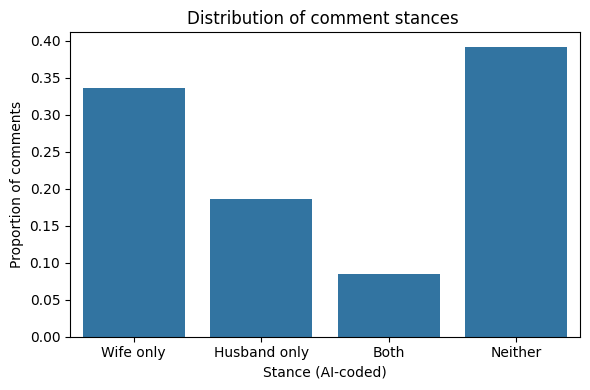

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


final_coded_data = pd.read_csv("final_coded_data.csv")

def stance_from(c1, c2):
    if c1 == 1 and c2 == 0:
        return "Wife only"
    elif c1 == 0 and c2 == 1:
        return "Husband only"
    elif c1 == 1 and c2 == 1:
        return "Both"
    else:
        return "Neither"


final_coded_data["stance_ai"] = final_coded_data.apply(
    lambda r: stance_from(r["ai_concept1"], r["ai_concept2"]),
    axis=1
)


order = ["Wife only", "Husband only", "Both", "Neither"]

stance_counts_ai = (
    final_coded_data["stance_ai"]
    .value_counts(normalize=True)     
    .reindex(order)
)

plt.figure(figsize=(6, 4))
sns.barplot(x=stance_counts_ai.index, y=stance_counts_ai.values)
plt.ylabel("Proportion of comments")
plt.xlabel("Stance (AI-coded)")
plt.title("Distribution of comment stances ")
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import ast
import numpy as np

df = pd.read_csv("final_coded_data.csv")

def stance_from(c1, c2):
    if c1 == 1 and c2 == 0:
        return "Wife only"
    elif c1 == 0 and c2 == 1:
        return "Husband only"
    elif c1 == 1 and c2 == 1:
        return "Both"
    else:
        return "Neither"

df["stance_ai"] = df.apply(
    lambda r: stance_from(r["ai_concept1"], r["ai_concept2"]),
    axis=1
)

def parse_sort_extra(x):
    if pd.isna(x):
        return {}
    if isinstance(x, (dict, list)):
        return x
    try:
        return ast.literal_eval(x)
    except:
        return {}

def get_show_more(d):
    if isinstance(d, dict):
        return float(d.get("show_more_score", np.nan))
    try:
        d2 = dict(d)
        return float(d2.get("show_more_score", np.nan))
    except:
        return np.nan

if "sort_extra_score" in df.columns:
    df["sort_extra_score_loaded"] = df["sort_extra_score"].apply(parse_sort_extra)
    df["show_more"] = df["sort_extra_score_loaded"].apply(get_show_more)

out_path = "final_for_r.csv"
df.to_csv(out_path, index=False)

print("✔ Saved clean file to:", out_path)

✔ Saved clean file to: final_for_r.csv


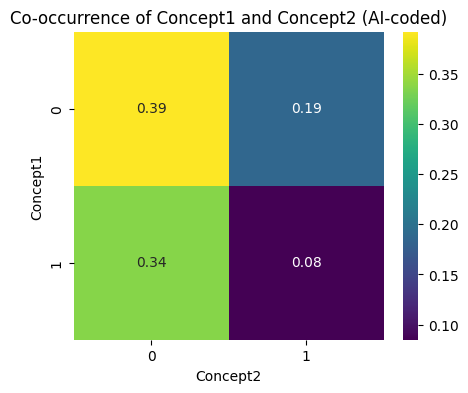

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


matrix = pd.crosstab(df["ai_concept1"], df["ai_concept2"], normalize="all")

plt.figure(figsize=(5,4))
sns.heatmap(matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Co-occurrence of Concept1 and Concept2 (AI-coded)")
plt.xlabel("Concept2")
plt.ylabel("Concept1")
plt.show()

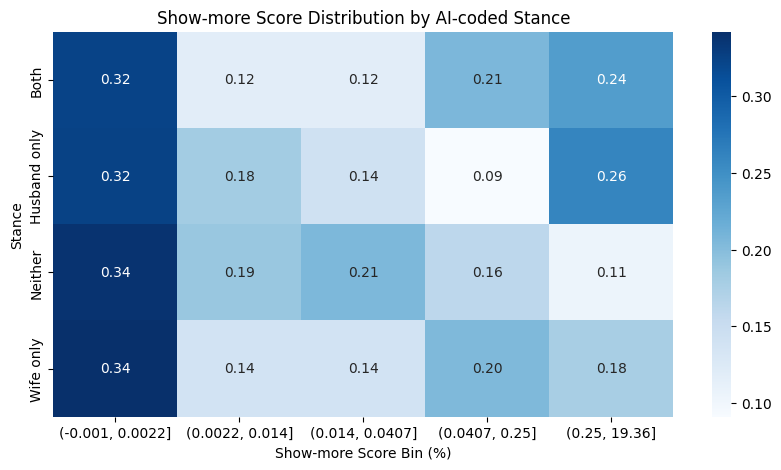

In [12]:
df2 = df.dropna(subset=["show_more", "stance_ai"]).copy()
df2["show_more_pct"] = df2["show_more"] * 100


df2["show_bin"] = pd.qcut(df2["show_more_pct"], q=6, duplicates="drop")

heat = pd.crosstab(df2["stance_ai"], df2["show_bin"], normalize="index")

plt.figure(figsize=(10,5))
sns.heatmap(heat, cmap="Blues", annot=True, fmt=".2f")
plt.title("Show-more Score Distribution by AI-coded Stance")
plt.xlabel("Show-more Score Bin (%)")
plt.ylabel("Stance")
plt.show()

## 7. Results and Answer to Research Question

Write **2–3 paragraphs** summarizing your findings.

